### Example 1 - further visualizations

In [33]:
# Not really required
import sys
sys.path.insert(0, '../..')

In [34]:
import pickle
import numpy as np
fpath = '../data/pyLDLE2/noisyswissroll_0.01//ldle.dat'
with open(fpath, "rb") as f:
    all_data = pickle.load(f)
X, labelsMat, ldle = all_data[:3]

In [35]:
# In case visualize_ is modified, load
# and use the newer version.
from pyLDLE2 import visualize_
import importlib
visualize_ = importlib.reload(visualize_)
ldle.vis = visualize_.Visualize(ldle.vis_opts['save_dir'])

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [36]:
### Data

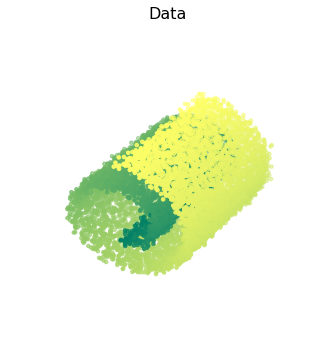

In [37]:
%matplotlib inline
ldle.vis.data(X, labelsMat[:,0], figsize=(5,5), s=50, cmap='summer')

In [38]:
### Eigenvalues

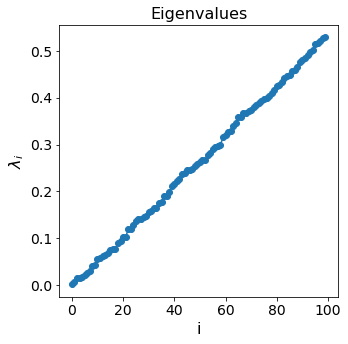

In [39]:
%matplotlib inline
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    ldle.vis.eigenvalues(ldle.LocalViews.GL.lmbda, figsize=(5,5))
else:
    print('Local views were constructed using', local_algo)

In [40]:
### Eigenvectors

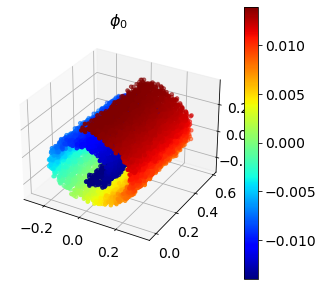

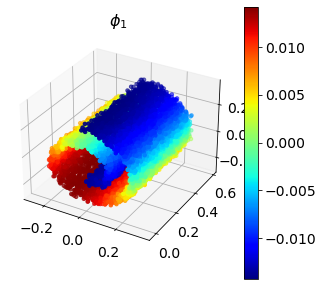

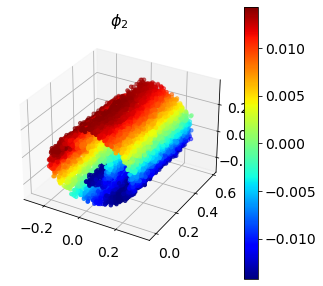

In [41]:
%matplotlib inline
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    n_eigvevs = 3
    for k in range(n_eigvevs):
        ldle.vis.eigenvector(X, ldle.LocalViews.GL.phi, k, figsize=(5,5), s=50)
else:
    print('Local views were constructed using', local_algo)

In [42]:
### gamma

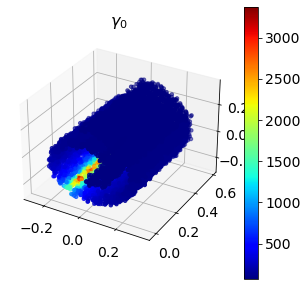

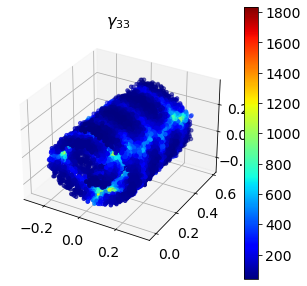

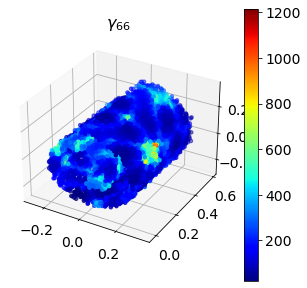

In [43]:
%matplotlib inline
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        n_eigvevs = 3
        for k in range(n_eigvevs):
            ldle.vis.gamma(X, ldle.LocalViews.gamma,
                           int(k*ldle.local_opts['N']/n_eigvevs),
                           figsize=(5,5), s=50)
    else:
        print('ldle.debug is False, thus ldle.LocalViews.gamma is not saved.')
else:
    print('Local views were constructed using', local_algo)

In [12]:
### No. of eigenvectors with small gradients at each point - possibly identifies boundary

In [13]:
%matplotlib qt
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        ldle.vis.n_eigvecs_w_grad_lt(X, ldle.LocalViews.IPGE.Atilde)
    else:
        print('ldle.debug is False, thus ldle.LocalViews.IPGE.Atilde is not saved.')
else:
    print('Local views were constructed using', local_algo)

In [ ]:
# Same visualization as above but plots based on the embedding

In [14]:
%matplotlib qt
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        ldle.vis.n_eigvecs_w_grad_lt(ldle.GlobalViews.y_final, ldle.LocalViews.IPGE.Atilde)
    else:
        print('ldle.debug is False, thus ldle.LocalViews.IPGE.Atilde is not saved.')
else:
    print('Local views were constructed using', local_algo)

In [15]:
### Distortion of local parameterizations without post-processing

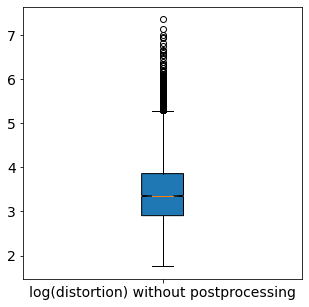

In [44]:
%matplotlib inline
import numpy as np
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        ldle.vis.distortion_boxplot(np.log(ldle.LocalViews.local_param_pre.zeta),
                                    title='log(distortion) without postprocessing',
                                    figsize=(5,5))
    else:
        print('ldle.debug is False, thus ldle.LocalViews.local_param_pre is not saved.')
else:
    ldle.vis.distortion_boxplot(np.log(ldle.LocalViews.local_param_post.zeta),
                                title='log(distortion of local views)',
                                figsize=(5,5))
    if ldle.d <= 3:
        ldle.vis.distortion(ldle.GlobalViews.y_final, ldle.LocalViews.local_param_post.zeta,
                            'Embedding colored by distortion',
                            figsize=(8,8), s=50)

In [17]:
### Distortion of local parameterizations with post-processing

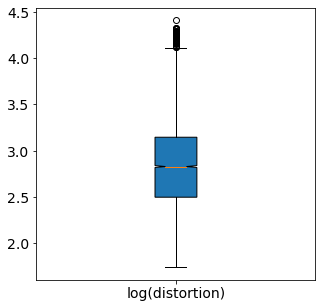

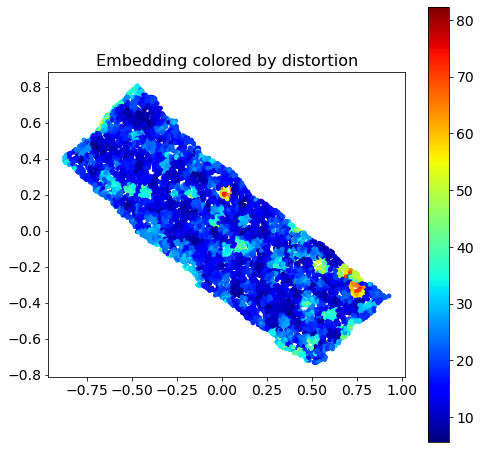

In [45]:
%matplotlib inline
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    ldle.vis.distortion_boxplot(np.log(ldle.LocalViews.local_param_post.zeta),
                                title='log(distortion)',
                                figsize=(5,5))
    if ldle.d <= 3:
        ldle.vis.distortion(ldle.GlobalViews.y_final, ldle.LocalViews.local_param_post.zeta,
                            'Embedding colored by distortion',
                            figsize=(8,8), s=50)
else:
    print('Local views were constructed using', local_algo)

In [ ]:
### Double or triple click on the first subplot to choose a point on the data and press any key to quit. Here we visualize: 1. Local views in the ambient and embedding space. 2. Chosen eigenvectors to construct the local parameterization. 3. Deviation of the chosen eigenvectors from being orthogonal and having same length.

In [19]:
%matplotlib qt
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        ldle.vis.local_views(X, ldle.LocalViews.GL.phi, ldle.LocalViews.U.toarray(),
                             ldle.LocalViews.gamma, ldle.LocalViews.IPGE.Atilde,
                             ldle.LocalViews.local_param_post.Psi_gamma,
                             ldle.LocalViews.local_param_post.Psi_i,
                             ldle.LocalViews.local_param_post.zeta, None)
    else:
        print('ldle.debug is False, thus intermediary data was not saved.')
else:
    print('Local views were constructed using', local_algo)

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/dhkohli/codebase/pyLDLE2/nbks/../pyLDLE2/visualize_.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


In [ ]:
# Same visualization as above but plots based on the embedding

In [20]:
%matplotlib qt
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        ldle.vis.local_views(ldle.GlobalViews.y_final, ldle.LocalViews.GL.phi,
                             ldle.LocalViews.U.toarray(),
                             ldle.LocalViews.gamma, ldle.LocalViews.IPGE.Atilde,
                             ldle.LocalViews.local_param_post.Psi_gamma,
                             ldle.LocalViews.local_param_post.Psi_i,
                             ldle.LocalViews.local_param_post.zeta, None)
    else:
        print('ldle.debug is False, thus intermediary data was not saved.')
else:
    print('Local views were constructed using', local_algo)

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/dhkohli/codebase/pyLDLE2/nbks/../pyLDLE2/visualize_.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


In [ ]:
### Chosen eigenvectors' indices' for local views

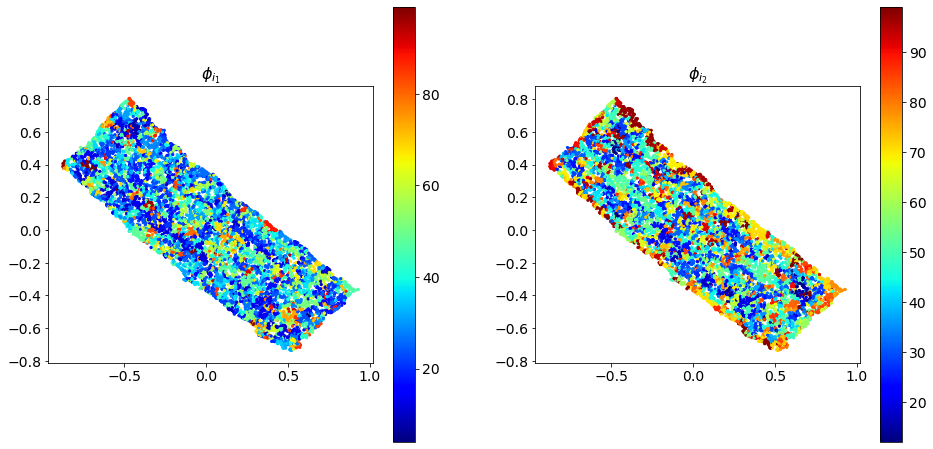

In [46]:
%matplotlib inline
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    ldle.vis.chosen_eigevec_inds_for_local_views(ldle.GlobalViews.y_final,
                                                 ldle.LocalViews.local_param_post.Psi_i,
                                                 figsize=(16,8))
else:
    print('Local views were constructed using', local_algo)

In [ ]:
### Sequence of intermediate views

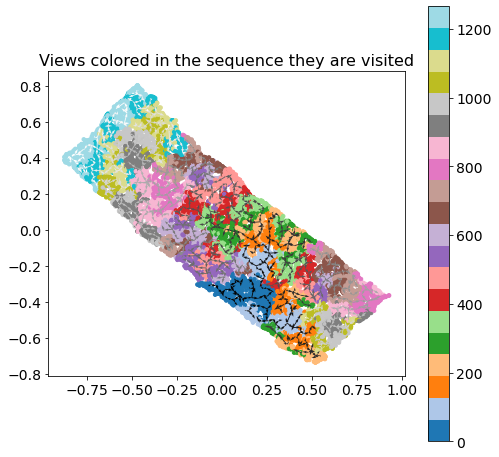

In [48]:
%matplotlib inline
if ldle.debug:
    ldle.vis.seq_of_intermediate_views(ldle.GlobalViews.y_final, ldle.IntermedViews.c,
                                       ldle.GlobalViews.seq_of_intermed_views_in_cluster[0],
                                       ldle.GlobalViews.parents_of_intermed_views_in_cluster[0],
                                       ldle.IntermedViews.Utilde, figsize=(8,8), s=50, cmap='tab20')
else:
    print('ldle.debug is False, thus intermediary data was not saved.')

In [ ]:
### Distortion of intermediate views

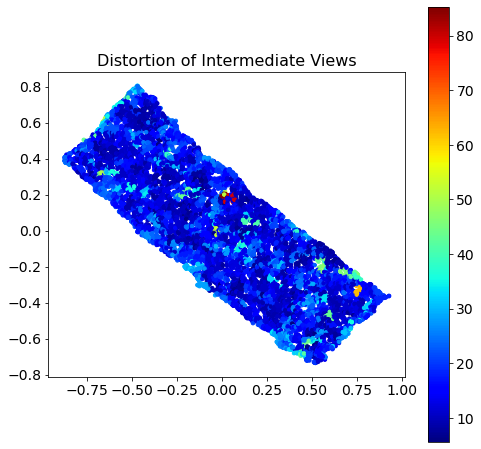

In [49]:
%matplotlib inline
ldle.vis.distortion(ldle.GlobalViews.y_final,
                    ldle.IntermedViews.intermed_param.zeta[ldle.IntermedViews.c],
                    'Distortion of Intermediate Views', figsize=(8,8), s=50)

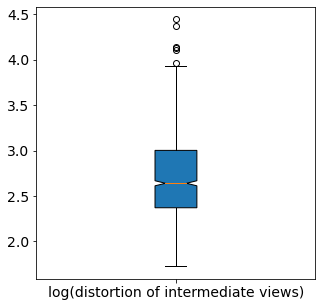

In [50]:
%matplotlib inline
ldle.vis.distortion_boxplot(np.log(ldle.IntermedViews.intermed_param.zeta),
                            title='log(distortion of intermediate views)',
                            figsize=(5,5))

In [ ]:
### Double or triple click on the first subplot to choose a point on the data and press any key to quit. Here we visualize: 1. Intermediate views in the ambient and embedding space. 2. Chosen eigenvectors to construct the intermediate parameterization. 3. Deviation of the chosen eigenvectors from being orthogonal and having same length.

In [26]:
%matplotlib qt
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        ldle.vis.intermediate_views(X, ldle.LocalViews.GL.phi, ldle.IntermedViews.Utilde,
                                    ldle.LocalViews.gamma, ldle.LocalViews.IPGE.Atilde,
                                    ldle.IntermedViews.intermed_param.Psi_gamma,
                                    ldle.IntermedViews.intermed_param.Psi_i,
                                    ldle.IntermedViews.intermed_param.zeta,
                                    ldle.IntermedViews.c)
    else:
        print('ldle.debug is False, thus intermediary data was not saved.')
else:
    print('Local views were constructed using', local_algo)

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/dhkohli/codebase/pyLDLE2/nbks/../pyLDLE2/visualize_.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


In [ ]:
# Same visualization as above but plots based on the embedding

In [27]:
%matplotlib qt
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    if ldle.debug:
        ldle.vis.intermediate_views(ldle.GlobalViews.y_final, ldle.LocalViews.GL.phi,
                                    ldle.IntermedViews.Utilde,
                                    ldle.LocalViews.gamma, ldle.LocalViews.IPGE.Atilde,
                                    ldle.IntermedViews.intermed_param.Psi_gamma,
                                    ldle.IntermedViews.intermed_param.Psi_i,
                                    ldle.IntermedViews.intermed_param.zeta,
                                    ldle.IntermedViews.c)
    else:
        print('ldle.debug is False, thus intermediary data was not saved.')
else:
    print('Local views were constructed using', local_algo)

Traceback (most recent call last):
  File "/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/Users/dhkohli/codebase/pyLDLE2/nbks/../pyLDLE2/visualize_.py", line 93, in on_close
    raise RuntimeError("Figure closed.")
RuntimeError: Figure closed.


In [139]:
### Chosen eigenvectors' indices' for intermediate views 

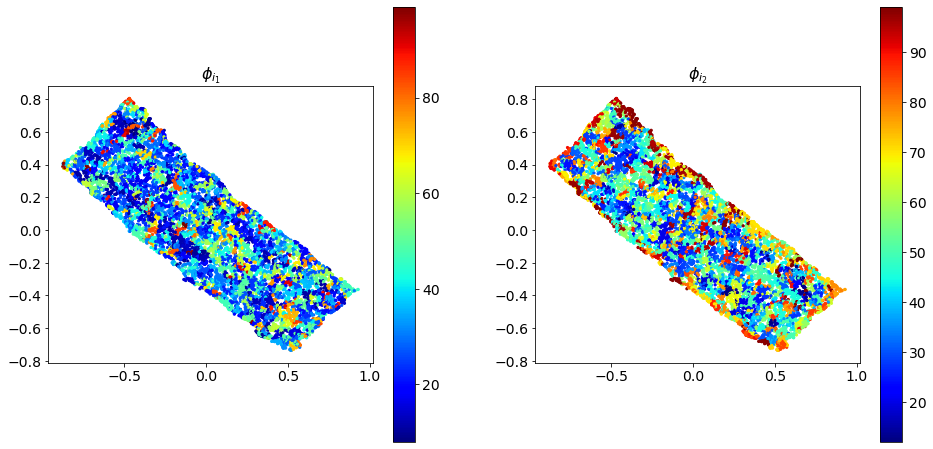

In [51]:
%matplotlib inline
local_algo = ldle.local_opts['algo']
if local_algo == 'LDLE':
    ldle.vis.chosen_eigevec_inds_for_intermediate_views(ldle.GlobalViews.y_final,
                                                        ldle.IntermedViews.intermed_param.Psi_i,
                                                        ldle.IntermedViews.c, figsize=(16,8))
else:
    print('Local views were constructed using', local_algo)

In [ ]:
### initial global embedding

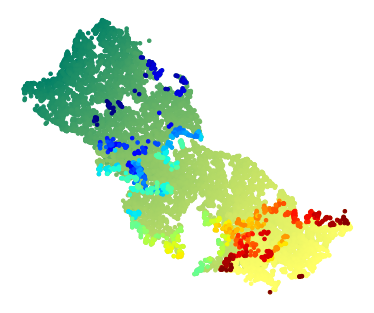

In [52]:
%matplotlib inline
ldle.vis.global_embedding(ldle.GlobalViews.y_init, ldle.vis_opts['c'], ldle.vis_opts['cmap_interior'],
                          ldle.GlobalViews.color_of_pts_on_tear_init, ldle.vis_opts['cmap_boundary'],
                          'Initial Embedding', figsize=(5,5), s=50)

In [ ]:
### final global embedding

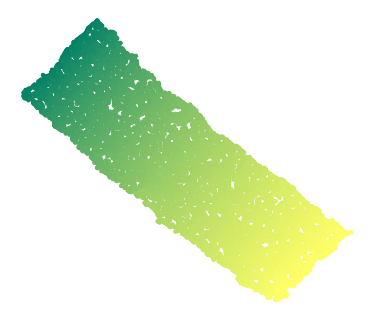

In [53]:
%matplotlib inline
ldle.vis.global_embedding(ldle.GlobalViews.y_final, ldle.vis_opts['c'], ldle.vis_opts['cmap_interior'],
                          ldle.GlobalViews.color_of_pts_on_tear_final, ldle.vis_opts['cmap_boundary'],
                          'Initial Embedding', figsize=(5,5), s=50)